In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import time

In [2]:
def print_images(image_to_print):
    """" Helper function to print image """
    
    # setting the figure size
    plt.figure(figsize=(20,20))
    
    # displaying the image
    plt.imshow(image_to_print)
    plt.show()

## SIFT detector

Points detected by sift:  3710


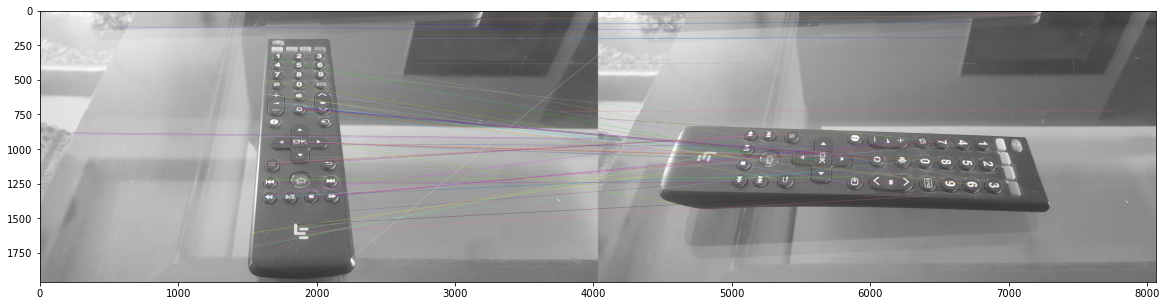

Time taken by sift in seconds:  4.278497934341431


In [3]:
# reading main image and convert to grayscale
original_image = cv.imread('remote1.jpg')

# reading second image that is to be compared and convert to grayscale
compare_image = cv.imread('remote2.jpg')

# Convert to grayscale
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
compare_image = cv.cvtColor(compare_image, cv.COLOR_BGR2GRAY)

# start time for performace of sift
start_time = time.time()

# initiazlizing sift detector
sift = cv.SIFT_create()

# getting keypoints and descriptors from original image
keypoint_image_1, descriptor_image_1 = sift.detectAndCompute(original_image,None)

# getting keypoints and descriptors from compare image
keypoint_image_2, descriptor_image_2 = sift.detectAndCompute(compare_image,None)

# applying brute force matcher which uses descriptor of both the images and matches them
brute_force_matcher = cv.BFMatcher()

matches = brute_force_matcher.knnMatch(descriptor_image_1,descriptor_image_2,k=2)

print('Points detected by sift: ',len(matches))

# Apply ratio test
good_matches = []

for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
matched_image = cv.drawMatchesKnn(original_image,keypoint_image_1,compare_image,keypoint_image_2,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# end time for performace of sift
end_time = time.time()

print_images(matched_image)
print('Time taken by sift in seconds: ',end_time - start_time)

## ORB detector

Points detected by orb:  500


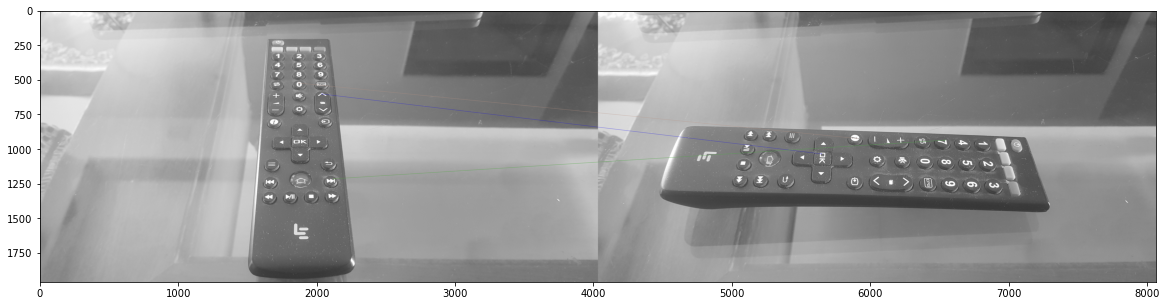

Time taken by orb 0.31975507736206055


In [4]:
# reading main image and convert to grayscale
original_image = cv.imread('remote1.jpg')

# reading second image that is to be compared and convert to grayscale
compare_image = cv.imread('remote2.jpg')

# Convert to grayscale
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
compare_image = cv.cvtColor(compare_image, cv.COLOR_BGR2GRAY)

# start time for performace of ORB
start_time = time.time()

# initiazlizing ORB detector
orb = cv.ORB_create()

# getting keypoints and descriptors from original image
keypoint_image_1, descriptor_image_1 = orb.detectAndCompute(original_image,None)

# getting keypoints and descriptors from compare image
keypoint_image_2, descriptor_image_2 = orb.detectAndCompute(compare_image,None)

# applying brute force matcher which uses descriptor of both the images and matches them
brute_force_matcher = cv.BFMatcher()

matches = brute_force_matcher.knnMatch(descriptor_image_1,descriptor_image_2,k=2)

print('Points detected by orb: ',len(matches))

# Apply ratio test
good_matches = []

for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
matched_image = cv.drawMatchesKnn(original_image,keypoint_image_1,compare_image,keypoint_image_2,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# end time for performace of orb
end_time = time.time()

print_images(matched_image)
print('Time taken by orb',end_time - start_time)

## Note

### In this notebook we used two algorithms using opencv SIFT( Scale Invariant Feature Transform ) and ORB( Orinted Fast and Rotated brief )

#### SIFT Algorithm 
<li>SIFT algorithm took a total time of 4.27 seconds to detect and match features.</li>
<li>SIFT algorithm found a total 3710 matches in features.</li>

#### ORB Algorithm 
<li>ORB algorithm took a total time of 0.319 seconds to detect and match features.</li>
<li>ORB algorithm found a total 500 matches in features.</li>

#### Observation 
<p>Time Comparison</p>
<li>SIFT took much time compared to ORB.</li>

<p>Matches Comparison</p>
<li>SIFT found more number of matches as compared to ORB. But SIFT includes false detection as well.</li>
<li>ORB performs better in terms of true detection of features.</li>
<li>SIFT detects more number of features which can be adjusted using threshold.</li>

